<a href="https://colab.research.google.com/github/cristianpandele/huggingface_audio/blob/main/Huggingface_Audio_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install Dependencies

In [1]:
!pip install -qqqq datasets[audio]
!pip install -qqqq gradio
!pip install -qqqq evaluate
!pip install -qqqq transformers[torch]
#!pip install git+https://github.com/huggingface/transformers

# 1. Imports

In [14]:
from datasets import load_dataset
from datasets import Audio as DatasetAudio
from transformers import pipeline
from transformers import AutoProcessor, SeamlessM4TModel
from transformers import AutoFeatureExtractor
from transformers import AutoModelForAudioClassification
from transformers import TrainingArguments
from transformers import Trainer
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# 2. Exercise

## 2.1. Load Dataset

In [ ]:
vox = load_dataset("facebook/voxpopuli", name="en_accented", split="test", streaming=True)
vox

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  wa

IterableDataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    n_shards: 1
})

## 2.2. Select Third Dataset Entry

In [ ]:
vox = vox.skip(2)
iterator = iter(vox)

third_entry = next(iterator)
third_entry

{'audio_id': '20181115-0900-PLENARY-en_20181115-11:18:17_3',
 'language': 16,
 'audio': {'path': 'test_part_0/20181115-0900-PLENARY-en_20181115-11:18:17_3.wav',
  'array': array([ 0.03717041,  0.08773804,  0.12280273, ..., -0.11514282,
         -0.08380127, -0.09283447]),
  'sampling_rate': 16000},
 'raw_text': 'The job constitution there is nothing about a free',
 'normalized_text': 'the job constitution there is nothing about a free',
 'gender': 'na',
 'speaker_id': '124706',
 'is_gold_transcript': True,
 'accent': 'en_cs'}

## 2.3. Plot Audio and Spectrograms

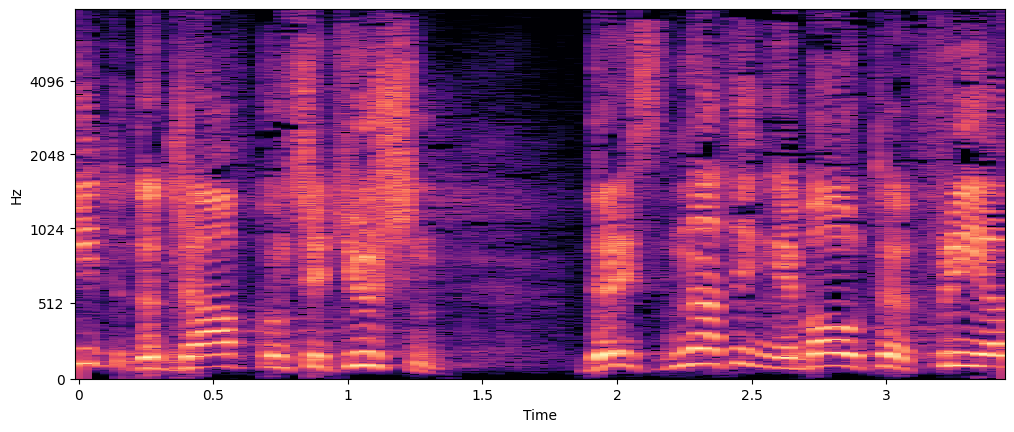

In [ ]:
plt.figure().set_figwidth(12)

entry_audio = third_entry['audio']
librosa.display.waveshow(entry_audio['array'], sr=entry_audio['sampling_rate'])


D = librosa.stft(entry_audio['array'])
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=entry_audio['sampling_rate'], fmax=8000)


## 2.4. Transcribe Text

In [ ]:
# Get Model for ASR
asr = pipeline("automatic-speech-recognition", model="openai/whisper-large-v3")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


generation_config.json:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

In [ ]:
transcribed_text_from_audio = asr(entry_audio["array"])


Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


In [ ]:
print (transcribed_text_from_audio['text'])
print (third_entry['normalized_text'])

if (transcribed_text_from_audio['text'] == third_entry['normalized_text']):
  print("Great success!")

# 3. Audio Classification


## 3.1. Load Minds Dataset

In [ ]:
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for PolyAI/minds14 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/minds14
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.w

Generating train split: 0 examples [00:00, ? examples/s]

## 3.2. Load XLS-R Classifier From Checkpoint

In [ ]:
classifier = pipeline(
    "audio-classification",
    model="anton-l/xtreme_s_xlsr_300m_minds14",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/2.73k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at anton-l/xtreme_s_xlsr_300m_minds14 were not used when initializing Wav2Vec2ForSequenceClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at anton-l/xtreme_s_xlsr_300m_minds14 and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

## 3.3. Run Classification

In [ ]:
classifier(minds[0]["audio"])

[{'score': 0.9611983895301819, 'label': 'pay_bill'},
 {'score': 0.029602158814668655, 'label': 'freeze'},
 {'score': 0.0035503290127962828, 'label': 'card_issues'},
 {'score': 0.002132321475073695, 'label': 'abroad'},
 {'score': 0.000882967549841851, 'label': 'high_value_payment'}]

## 3.4. Load Speech Commands Dataset

In [ ]:
speech_commands = load_dataset(
    "speech_commands", "v0.02", split="validation", streaming=True
)
sample = next(iter(speech_commands))

## 3.5. Load Automatic Speech Transformer Classifier From Checkpoint

In [ ]:
classifier = pipeline(
    "audio-classification", model="MIT/ast-finetuned-speech-commands-v2"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/342M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

[{'score': 0.9999892711639404, 'label': 'backward'},
 {'score': 1.7504938796264469e-06, 'label': 'happy'},
 {'score': 6.703033363919531e-07, 'label': 'follow'},
 {'score': 5.805895852972753e-07, 'label': 'stop'},
 {'score': 5.614552378574444e-07, 'label': 'up'}]

## 3.6. Run Classification

In [ ]:
classifier(sample["audio"].copy())

In [ ]:
Audio(sample["audio"]["array"], rate=sample["audio"]["sampling_rate"])

## 3.7. Load Fleurs Dataset

In [ ]:
fleurs = load_dataset("google/fleurs", "all", split="validation", streaming=True)
sample = next(iter(fleurs))

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for google/fleurs contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/google/fleurs
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


## 3.8. Load Whisper Fleurs Classifier From Checkpoint

In [ ]:
# classifier = pipeline(
#     "audio-classification", model="sanchit-gandhi/whisper-medium-fleurs-lang-id"
# )

classifier = pipeline(
     "audio-classification", model="anton-l/xtreme_s_xlsr_300m_fleurs_langid_quicker_warmup"
 )

config.json:   0%|          | 0.00/5.81k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at anton-l/xtreme_s_xlsr_300m_fleurs_langid_quicker_warmup were not used when initializing Wav2Vec2ForSequenceClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at anton-l/xtreme_s_xlsr_300m_fleurs_langid_quicker_warmup and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrization

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

## 3.9. Run Classification

In [ ]:
classifier(sample["audio"])

[{'score': 0.6530705690383911, 'label': 'lv_lv'},
 {'score': 0.15058164298534393, 'label': 'de_de'},
 {'score': 0.07177548110485077, 'label': 'af_za'},
 {'score': 0.02134733647108078, 'label': 'lt_lt'},
 {'score': 0.01586356945335865, 'label': 'nl_nl'}]

## 3.10. One-Shot Classification

### 3.10.1. Load Environmental Speech Challenge Dataset

In [ ]:
dataset = load_dataset("ashraq/esc50", split="train", streaming=True)
audio_sample = next(iter(dataset))["audio"]["array"]

Repo card metadata block was not found. Setting CardData to empty.


### 3.10.2. Set Candidate Labels

In [ ]:
candidate_labels = ["Sound of a dog", "Sound of vacuum cleaner"]

### 3.10.3. Loat Classifier From Checkpoint

In [ ]:
classifier = pipeline(
    task="zero-shot-audio-classification", model="laion/clap-htsat-unfused"
)

### 3.10.4. Run Classification

In [ ]:
classifier(audio_sample, candidate_labels=candidate_labels)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/615M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

[{'score': 0.9997242093086243, 'label': 'Sound of a dog'},
 {'score': 0.00027583082555793226, 'label': 'Sound of vacuum cleaner'}]

In [ ]:
Audio(audio_sample, rate=16000)

# 4. Music Classification

## 4.1. Load GTZAN Dataset

In [3]:
from datasets import load_dataset

gtzan = load_dataset("marsyas/gtzan", "all")
gtzan

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for marsyas/gtzan contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/marsyas/gtzan
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.war

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 999
    })
})

## 4.2. Split Training Set

In [4]:
gtzan = gtzan['train'].train_test_split(shuffle=True, test_size = 0.1)
gtzan

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 899
    })
    test: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 100
    })
})

## 4.3. Inspect First Element of Training Set

In [5]:
entry = gtzan["train"][0]
print(entry)

entry_audio = entry["audio"]
Audio(entry_audio["array"], rate = entry_audio["sampling_rate"])

print (gtzan["train"].features)

# Get genre of dataset entry
entry_int_genre = entry["genre"]
id2label_fn = gtzan["train"].features["genre"].int2str
entry_genre = id2label_fn(entry_int_genre)
print(f"Genre: {entry_genre}")

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/reggae/reggae.00038.wav', 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/reggae/reggae.00038.wav', 'array': array([-0.01907349, -0.03610229, -0.03683472, ..., -0.11407471,
       -0.12088013, -0.11746216]), 'sampling_rate': 22050}, 'genre': 8}
{'file': Value(dtype='string', id=None), 'audio': Audio(sampling_rate=22050, mono=True, decode=True, id=None), 'genre': ClassLabel(names=['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'], id=None)}
Genre: reggae


## 4.4. GRadio Interface

In [6]:
import gradio as gr

def generate_audio():
    example = gtzan["train"].shuffle()[0]
    audio = example["audio"]
    return (
        audio["sampling_rate"],
        audio["array"],
    ), id2label_fn(example["genre"])


with gr.Blocks() as demo:
    with gr.Column():
        for _ in range(4):
            audio, label = generate_audio()
            output = gr.Audio(audio, label=label)

demo.launch(debug=True)

/usr/local/lib/python3.10/dist-packages/gradio/processing_utils.py:568: UserWarning: Trying to convert audio automatically from float64 to 16-bit int format.
  warnings.warn(warning.format(data.dtype))


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://fa98ef59cc1eea5096.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://fa98ef59cc1eea5096.gradio.live


## 4.5. Import Normlizer for Classifier

In [6]:
model_id = "ntu-spml/distilhubert"
feature_extractor = AutoFeatureExtractor.from_pretrained(
    model_id, do_normalize=True, return_attention_mask=True
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## 4.6. Data Preprocessing

In [15]:
sampling_rate = feature_extractor.sampling_rate
print(f"Model sampling rate: {sampling_rate}")

dataset_sampling_rate = gtzan["train"][0]["audio"]["sampling_rate"]
print(f"Original dataset sampling rate: {dataset_sampling_rate}")

if (dataset_sampling_rate != sampling_rate):
  gtzan = gtzan.cast_column("audio", DatasetAudio(sampling_rate=sampling_rate))
  dataset_sampling_rate = gtzan["train"][0]["audio"]["sampling_rate"]
  print (f"New dataset sampling rate: {dataset_sampling_rate}")

Model sampling rate: 16000
Original dataset sampling rate: 22050
New dataset sampling rate: 16000


# 4.7. Normalize Dataset for Classification

### 4.7.1. Resampling

In [16]:
sample = gtzan["train"][0]["audio"]
print(f"Mean: {np.mean(sample['array']):.3}, Variance: {np.var(sample['array']):.3}")

inputs = feature_extractor(sample["array"], sampling_rate=sample["sampling_rate"])

print(f"inputs keys: {list(inputs.keys())}")
print(
    f"Mean: {np.mean(inputs['input_values']):.3}, Variance: {np.var(inputs['input_values']):.3}"
)

Mean: -1.39e-05, Variance: 0.00716
inputs keys: ['input_values', 'attention_mask']
Mean: -1.18e-09, Variance: 1.0


### 4.7.2. Sample Trimming and Centering

In [17]:
# Trim audio to 30 second segments
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
        audio_arrays,
        sampling_rate=feature_extractor.sampling_rate,
        max_length=int(feature_extractor.sampling_rate * max_duration),
        truncation=True,
        return_attention_mask=True,
    )
    return inputs

max_duration = 30.0
gtzan_encoded = gtzan.map(
    preprocess_function,
    remove_columns=["audio", "file"],
    batched=True,
    batch_size=100,
    num_proc=1,
)
gtzan_encoded

Map:   0%|          | 0/899 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['genre', 'input_values', 'attention_mask'],
        num_rows: 899
    })
    test: Dataset({
        features: ['genre', 'input_values', 'attention_mask'],
        num_rows: 100
    })
})

### 4.7.3. Column Harmonization

In [18]:
# Rename the genre column to label
gtzan_encoded = gtzan_encoded.rename_column("genre", "label")

# Conversions between numeric and string labels
id2label = {
    str(i): id2label_fn(i)
    for i in range(len(gtzan_encoded["train"].features["label"].names))
}
label2id = {v: k for k, v in id2label.items()}

id2label["7"]

'pop'

## 4.8. Model Training

### 4.8.1. Hub Login

In [19]:
from huggingface_hub import notebook_login

notebook_login()

### 4.8.2. Finetuning

In [20]:
num_labels = len(id2label)

model = AutoModelForAudioClassification.from_pretrained(
    model_id,
    num_labels=num_labels,
    label2id=label2id,
    id2label=id2label,
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of HubertForSequenceClassification were not initialized from the model checkpoint at ntu-spml/distilhubert and are newly initialized: ['classifier.bias', 'classifier.weight', 'encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### 4.8.3. Training

In [ ]:
import evaluate

model_name = model_id.split("/")[-1]
batch_size = 8
gradient_accumulation_steps = 1
num_train_epochs = 10

training_args = TrainingArguments(
    f"{model_name}-finetuned-gtzan",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=gradient_accumulation_steps,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    warmup_ratio=0.1,
    logging_steps=5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=False,
    push_to_hub=True,
)


metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

trainer = Trainer(
    model,
    training_args,
    train_dataset=gtzan_encoded["train"],
    eval_dataset=gtzan_encoded["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

trainer.train()